In [ ]:
!pip install fer

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
import cv2

from fer import FER

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [ ]:
import requests
import numpy as np

In [ ]:
url = 'https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F618942%2Fe72fc2820f1452bcdc99b4bc69e4c7b0%2FMacBook%20Air%20-%201.png?generation=1689578335866939&alt=media'
response = requests.get(url)
image_np = np.frombuffer(response.content, np.uint8)
input_image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
emotion_detector = FER()
print(emotion_detector.detect_emotions(input_image))

[{'box': array([605,  71, 100, 100], dtype=int32), 'emotions': {'angry': 0.56, 'disgust': 0.06, 'fear': 0.02, 'happy': 0.0, 'sad': 0.17, 'surprise': 0.0, 'neutral': 0.18}}, {'box': array([415,  71, 106, 106], dtype=int32), 'emotions': {'angry': 0.31, 'disgust': 0.03, 'fear': 0.05, 'happy': 0.0, 'sad': 0.27, 'surprise': 0.0, 'neutral': 0.33}}, {'box': array([ 31,  74, 115, 115], dtype=int32), 'emotions': {'angry': 0.17, 'disgust': 0.0, 'fear': 0.1, 'happy': 0.01, 'sad': 0.1, 'surprise': 0.0, 'neutral': 0.62}}, {'box': array([220,  88, 120, 120], dtype=int32), 'emotions': {'angry': 0.39, 'disgust': 0.1, 'fear': 0.15, 'happy': 0.0, 'sad': 0.25, 'surprise': 0.0, 'neutral': 0.1}}, {'box': array([220, 336, 113, 113], dtype=int32), 'emotions': {'angry': 0.01, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.8, 'sad': 0.01, 'surprise': 0.0, 'neutral': 0.17}}, {'box': array([413, 349, 116, 116], dtype=int32), 'emotions': {'angry': 0.13, 'disgust': 0.0, 'fear': 0.28, 'happy': 0.02, 'sad': 0.01, 'surpris

In [ ]:
result = emotion_detector.detect_emotions(input_image)

In [ ]:
bounding_box=[]
emot=[]
for i in range(len(result)):
    bounding_box.append(result[i]['box'])
    emot.append(result[i]['emotions'])

In [ ]:
for i in range(len(result)):
    print(max(emot[i], key=emot[i].get))


angry
neutral
neutral
angry
happy
surprise
surprise
neutral


In [ ]:
for i in range(len(result)):
  cv2.rectangle(input_image,(
    bounding_box[i][0], bounding_box[i][1]),(
    bounding_box[i][0] + bounding_box[i][2], bounding_box[i][1] + bounding_box[i][3]),
                (0, 155, 255), 2,)
for i in range(len(result)):
   cv2.putText(input_image,max(emot[i], key=emot[i].get),
               (bounding_box[i][0], bounding_box[i][1] + bounding_box[i][3]),
               cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,cv2.LINE_AA,)
cv2.imwrite("emotion.jpg", input_image)

True

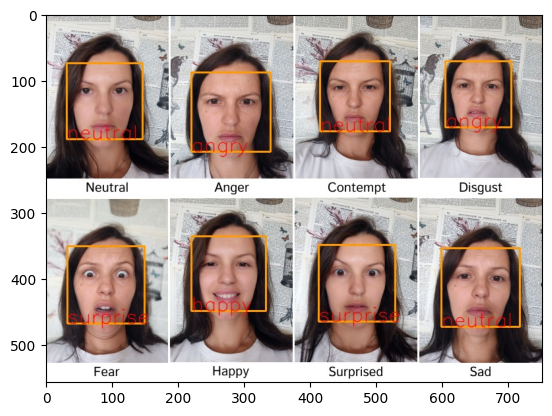

In [ ]:
result_image = mpimg.imread('emotion.jpg')
imgplot = plt.imshow(result_image)
# Display Output Image
plt.show()

In [34]:
import requests

video_url = 'https://www.shutterstock.com/shutterstock/videos/1110324787/preview/stock-footage-multiracial-colleagues-involved-in-online-conference-video-call.webm'
output_path = 'downloaded_video.mp4'

response = requests.get(video_url, stream=True)
if response.status_code == 200:
    with open(output_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"Video downloaded successfully to {output_path}")
else:
    print(f"Failed to download video. Status code: {response.status_code}")

Video downloaded successfully to downloaded_video.mp4


In [35]:
emotion_detector = FER()

cap = cv2.VideoCapture('downloaded_video.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (frame_width, frame_height))

while True:
  ret, frame = cap.read()
  if not ret:
    break

  input_image = frame.copy()
  result = emotion_detector.detect_emotions(input_image)
  bounding_box=[]
  emot=[]
  for i in range(len(result)):
      bounding_box.append(result[i]['box'])
      emot.append(result[i]['emotions'])
  for i in range(len(result)):
    cv2.rectangle(input_image,(
      bounding_box[i][0], bounding_box[i][1]),(
      bounding_box[i][0] + bounding_box[i][2], bounding_box[i][1] + bounding_box[i][3]),
                  (0, 155, 255), 2,)
    cv2.putText(input_image,max(emot[i], key=emot[i].get),
                (bounding_box[i][0], bounding_box[i][1] + bounding_box[i][3]),
                cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,cv2.LINE_AA,)
  out.write(input_image)

cap.release()
out.release()
cv2.destroyAllWindows()